# Notebook 5: Using minervachem to filter substructures in chemical fingerprints

This notebook provides a quick demonstration of minervachem capabilities to create substructural graphlet fingerprints with element filtering. 

In this example we will look into metal filtering in a metal-organic compound, but filtering capabilites will work with any legit chemical element.

## 5.0 Loading a metal-containg complex.

In [1]:
from rdkit.Chem import MolFromSmiles, AddHs

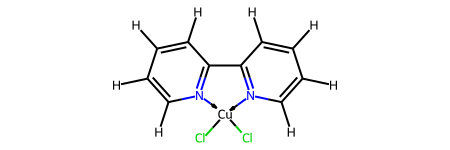

In [2]:
mol = MolFromSmiles('c1cccn->2c1-c1n->3cccc1.[Cu]23(Cl)Cl')
mol = AddHs(mol) # adding explicit hydrogens is always recommended when using minervachem
mol

## 5.1 Filtering substructures by user-provided elements

The function allows filtering molecular substructures based on specific chemical elements. Elements must be provided as a tuple of their chemical symbols (e.g., ('Cu', 'Fe', 'Zn')).

Two filtering modes are available:

1. Filter IN (filter_in=True):
   - Keeps only substructures containing at least one of the specified elements
   - Example: When filtering for ('Cu'), all substructures that contain at least one copper atom are retained

2. Filter OUT (filter_in=False):
   - Keeps only substructures that contain none of the specified elements
   - Example: When filtering for ('Cu'), all substructures without copper atoms are retained

Let's demonstrate this by filtering IN all copper-containing substructures:

In [3]:
from minervachem.fingerprinters import GraphletFingerprinter
elements_to_filter = ('Cu',)
my_fingerprinter = GraphletFingerprinter(
        max_len=3,
        elements=elements_to_filter,
        filter_in=True
    )

fingerprint, bitinfo = my_fingerprinter(mol)

print(f'Retained substructures count: {sum(1 for value in fingerprint.values() if value != 0)}')
print(f'=> {sum(1 for value in fingerprint.values() if value != 0)} out of {len(fingerprint)} substructures in the molecule contain {elements_to_filter}')

Retained substructures count: 7
=> 7 out of 22 substructures in the molecule contain ('Cu',)


Let's take a look at the filtered substructures:

(<Figure size 1000x1500 with 9 Axes>,
 array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >, <Axes: >], dtype=object))

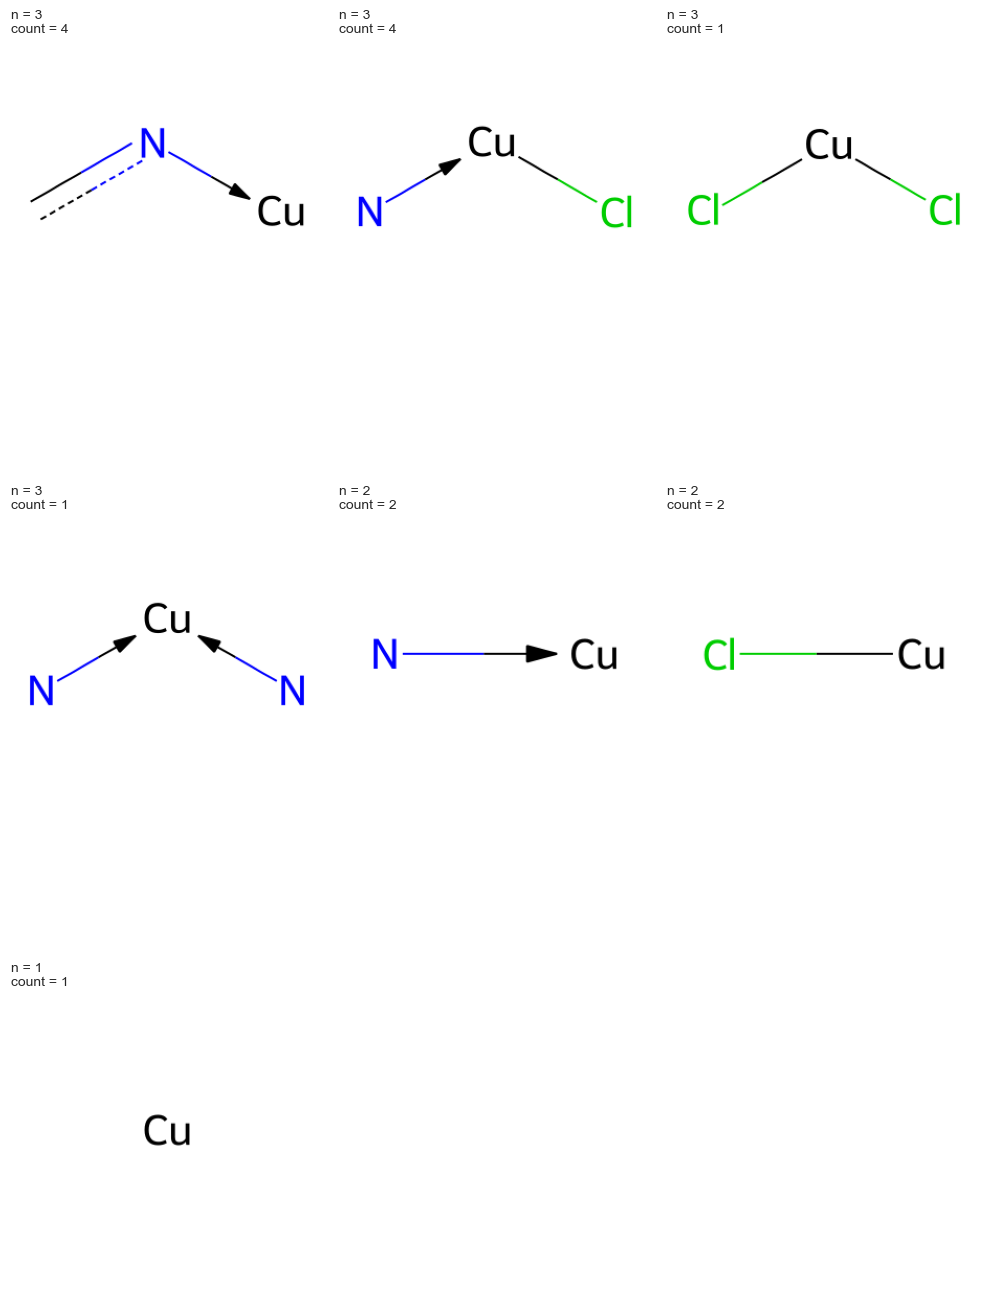

In [4]:
from minervachem.plotting import plot_fingerprint
plot_fingerprint(mol, my_fingerprinter, show_bit_ids=False)

While our previous example kept copper-containing substructures, we can also do the opposite.
Setting filter_in=False excludes all substructures containing copper atoms, effectively creating a fingerprint of only the copper-free portions of the molecule:

In [5]:
elements_to_filter = ('Cu',)
my_fingerprinter_out = GraphletFingerprinter(
        max_len=3,
        elements=elements_to_filter,
        filter_in=False
    )

fingerprint_out, bitinfo_out = my_fingerprinter_out(mol)

print(f'Retained substructures count: {sum(1 for value in fingerprint_out.values() if value != 0)}')
print(f'=> {sum(1 for value in fingerprint_out.values() if value != 0)} out of {len(fingerprint_out)} substructures in the molecule do not contain {elements_to_filter}')

Retained substructures count: 15
=> 15 out of 22 substructures in the molecule do not contain ('Cu',)


(<Figure size 1000x2500 with 15 Axes>,
 array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >, <Axes: >], dtype=object))

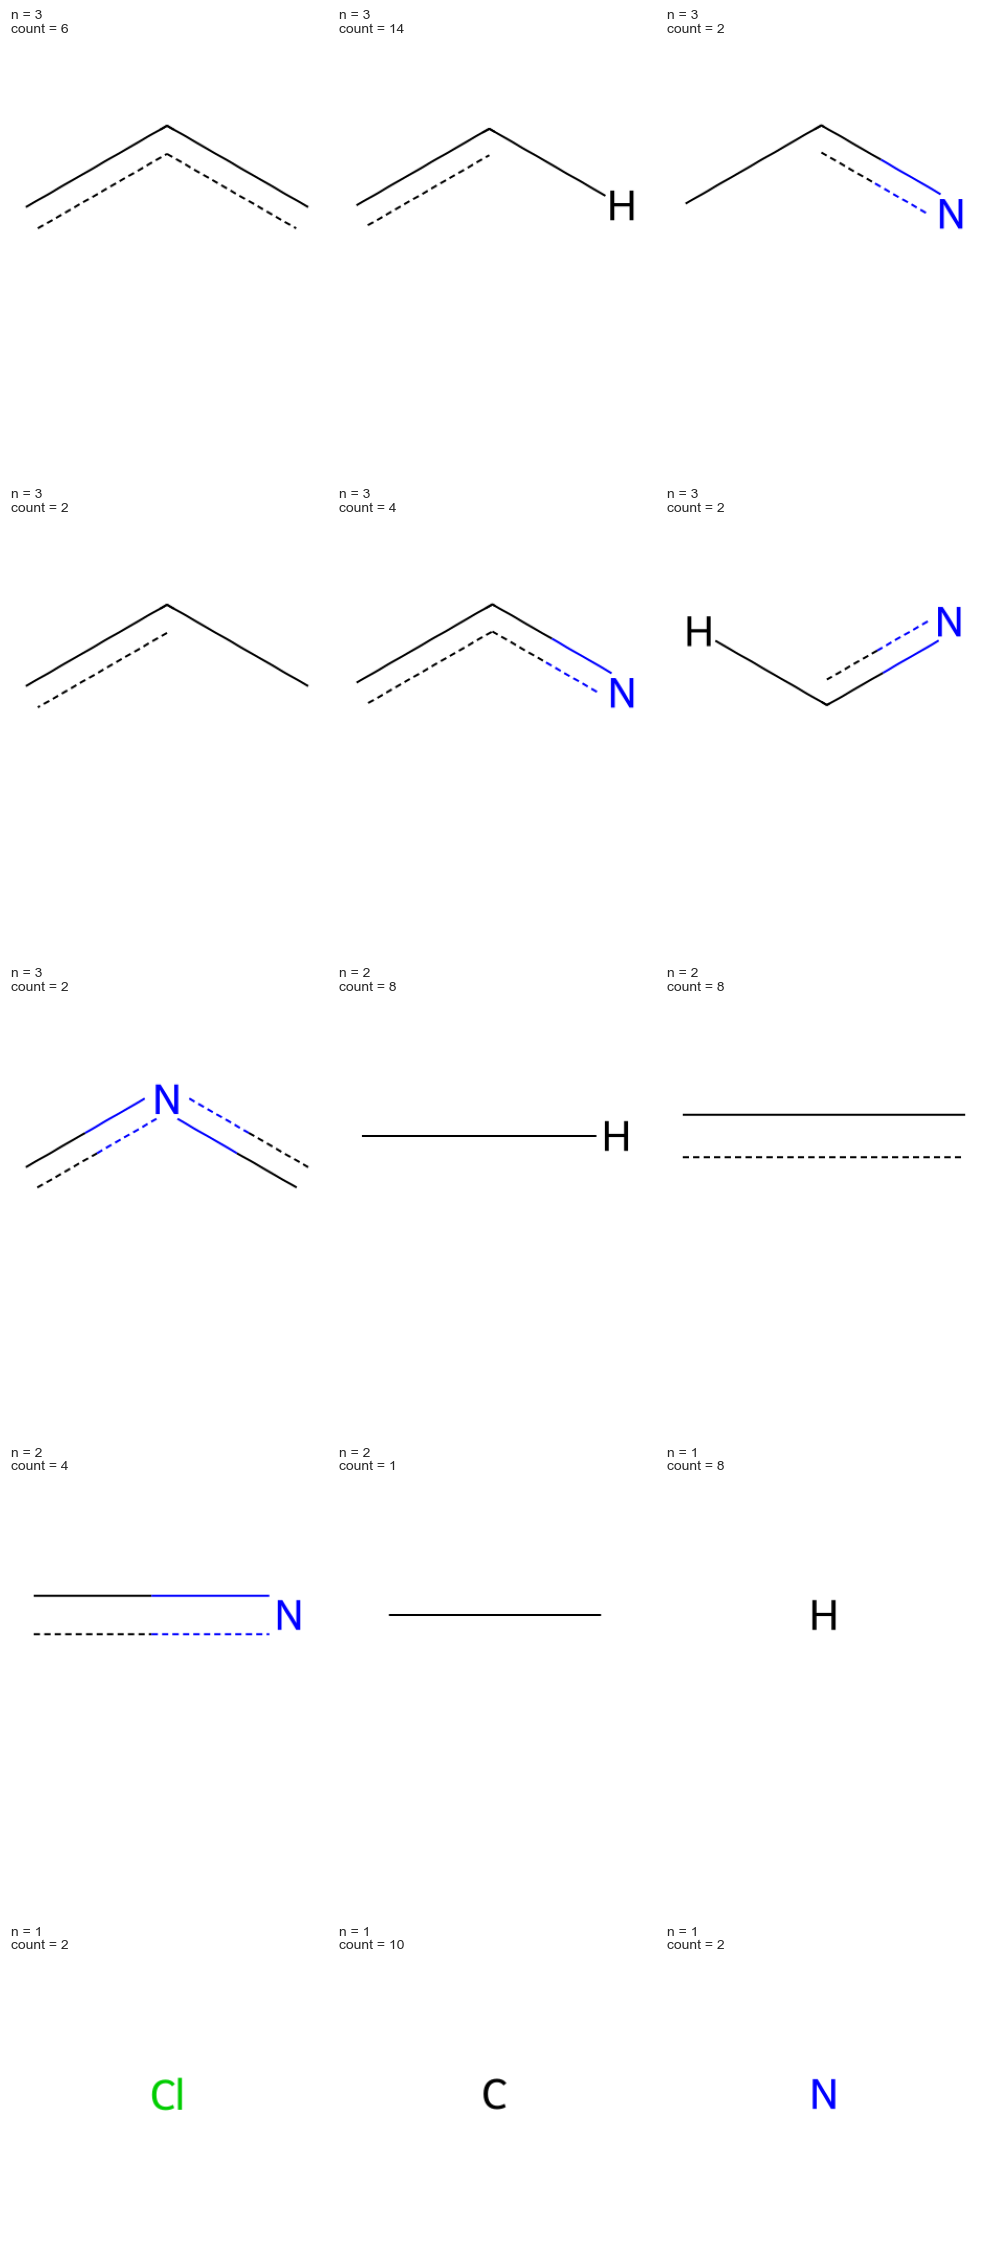

In [6]:
plot_fingerprint(mol, my_fingerprinter_out, show_bit_ids=False)

Input Validation Examples

1. Empty Filter List:
When no elements are provided (empty tuple), the function returns the complete fingerprint
without any filtering

In [7]:
elements_to_filter = ()
my_fingerprinter_nofilter = GraphletFingerprinter(
        max_len=3,
        elements=elements_to_filter,
        filter_in=True
    )
fingerprint_nofilter, bitinfo_nofilter = my_fingerprinter_nofilter(mol)
print(f'{sum(1 for value in fingerprint_nofilter.values() if value != 0)} out of {len(fingerprint_nofilter)} substructures are retained.')

No elements to filter. Complete fingerprints are returned.
22 out of 22 substructures are retained.


2. Invalid Chemical Symbols:
When the provided symbols don't match any atoms in the molecule or aren't valid chemical symbols,
the function returns an empty fingerprint and prints a warning message (if verbose=True)

In [8]:
elements_to_filter = ('abracadabra',)
my_fingerprinter_invalid = GraphletFingerprinter(
        max_len=3,
        elements=elements_to_filter,
        filter_in=True,
    )
my_fingerprinter_invalid.verbose = True
fingerprint_invalid, bitinfo_invalid = my_fingerprinter_invalid(mol)
print(f'{sum(1 for value in fingerprint_invalid.values() if value != 0)} out of {len(fingerprint_invalid)} substructures are retained.')

Elements to filter not found OR incorrect element symbols are entered. Empty FP is returned
0 out of 22 substructures are retained.


## 5.2 Looking for substructures with desired elements in terminal positions

When terminal_pos=True, the function will only keep substructures where the specified elements appear in terminal positions (atoms with only one neighbor). 

This is useful for analyzing end groups or ligand binding sites.

Example 1: Terminal Copper Atoms

Setting terminal_pos=True and elements=('Cu',) will keep only substructures where copper atoms have exactly one neighbor.

In [9]:
elements_to_filter = ('Cu', )
my_fingerprinter_cu_t = GraphletFingerprinter(
        max_len=3,
        elements=elements_to_filter,
        filter_in=True,
        terminal_pos=True,
    )

fingerprint_cu_t, bitinfo_cu_t = my_fingerprinter_cu_t(mol)

print(f'Retained substructures count:  {sum(1 for value in fingerprint_cu_t.values() if value != 0)}')
print(f'=> {sum(1 for value in fingerprint_cu_t.values() if value != 0)} out of {len(fingerprint_cu_t)} substructures in the molecule have {elements_to_filter[0]} in terminal position')

Retained substructures count:  4
=> 4 out of 22 substructures in the molecule have Cu in terminal position


(<Figure size 1000x1000 with 6 Axes>,
 array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       dtype=object))

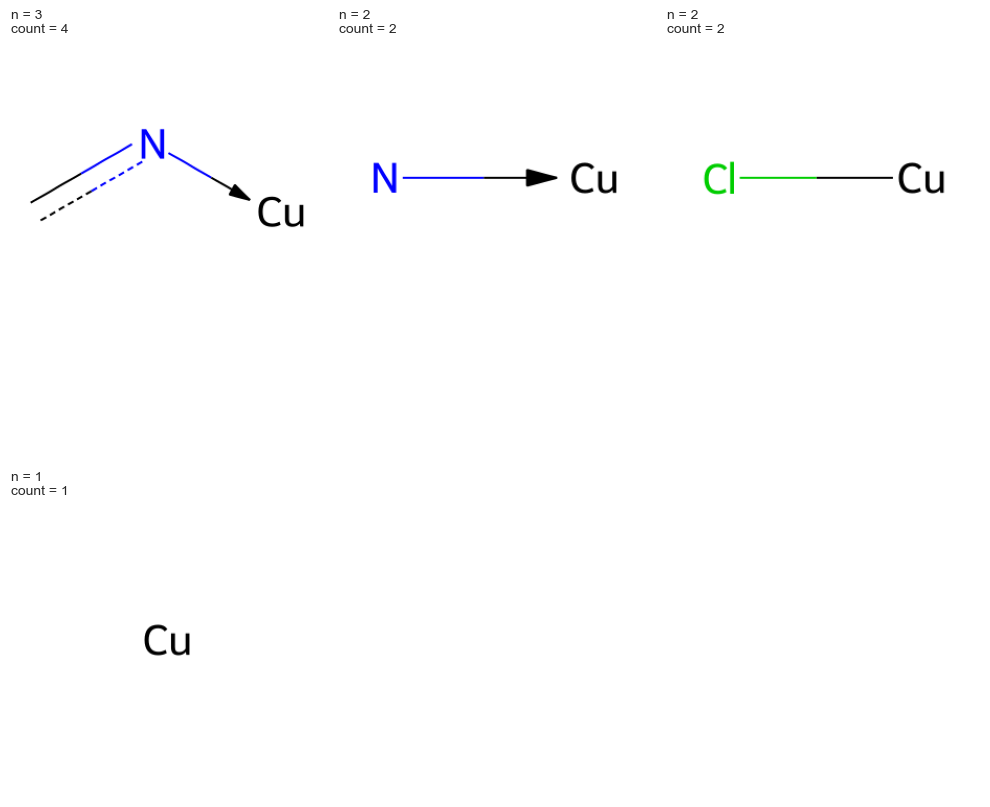

In [10]:
plot_fingerprint(mol, my_fingerprinter_cu_t, show_bit_ids=False)

Example 2: Multiple Terminal Elements

We can also filter for multiple elements in terminal positions using elements=('Cu', 'Cl'). 

This will keep substructures where either copper OR chlorine atoms appear as terminal groups (having exactly one neighbor). 

In [11]:
elements_to_filter = ('Cu', 'Cl')
my_fingerprinter_cucl_t = GraphletFingerprinter(
        max_len=3,
        elements=elements_to_filter,
        filter_in=True,
        terminal_pos=True,
    )

fingerprint_cucl_t, bitinfo_cucl_t = my_fingerprinter_cucl_t(mol)

print(f'Retained substructures count:  {sum(1 for value in fingerprint_cucl_t.values() if value != 0)}')
print(f'=> {sum(1 for value in fingerprint_cucl_t.values() if value != 0)} out of {len(fingerprint_cucl_t)} substructures in the molecule have {elements_to_filter} in terminal position')

Retained substructures count:  7
=> 7 out of 22 substructures in the molecule have ('Cu', 'Cl') in terminal position


(<Figure size 1000x1500 with 9 Axes>,
 array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >, <Axes: >], dtype=object))

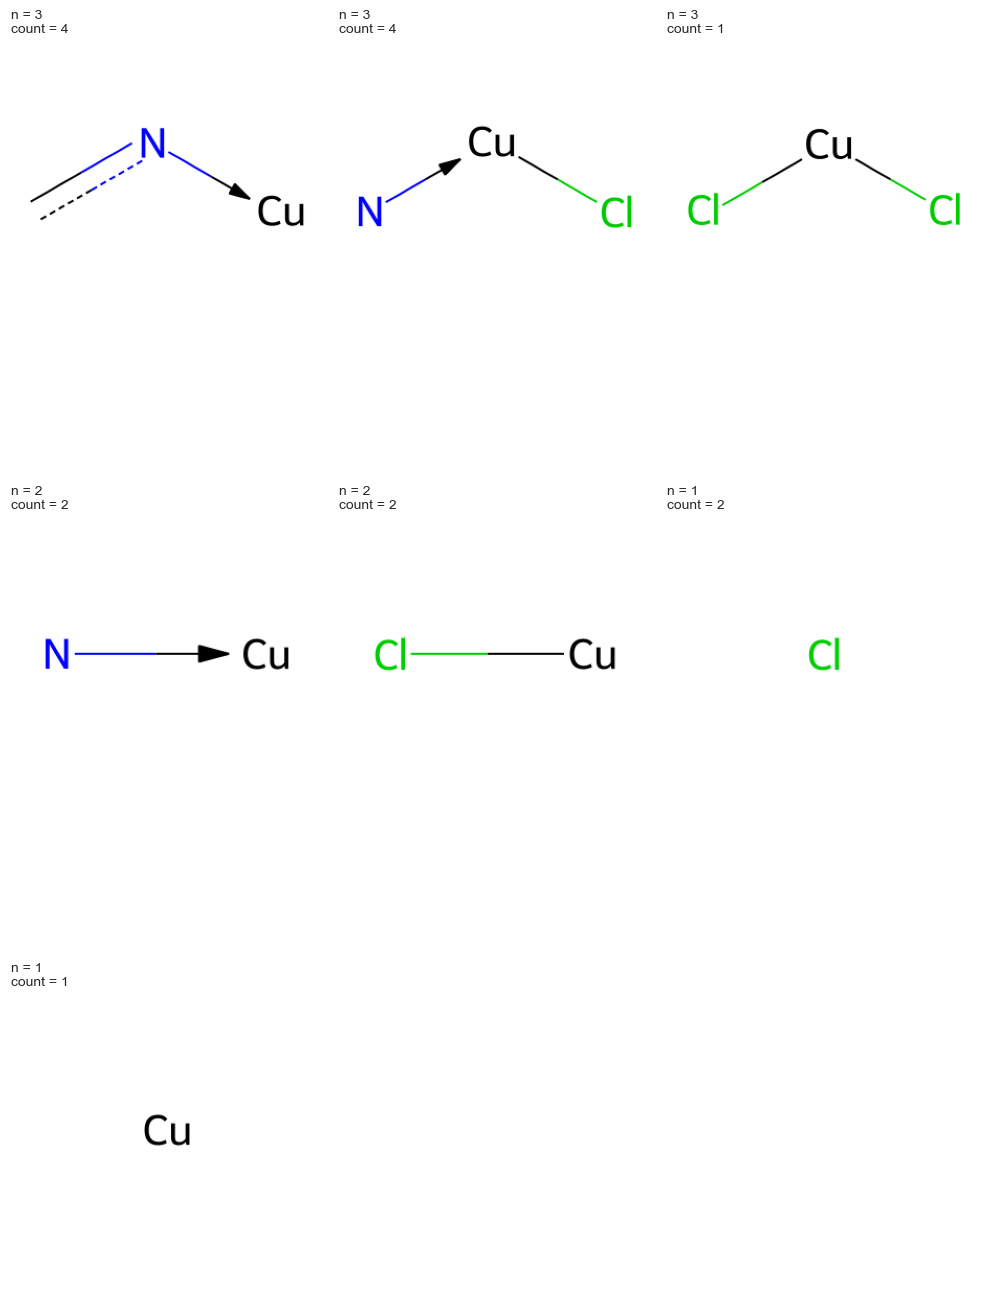

In [12]:
plot_fingerprint(mol, my_fingerprinter_cucl_t, show_bit_ids=False)

## 5.3 Including filtering in dataset handling

To incorporate elemental filtering into your ML pipeline when working with datasets, simply pass the modified fingerprinter configuration to your transformer. 

The follwoing example builds on Demo 2 (Regression_and_visualization), where we:

    - Demonstrated basic regression on QM9
    - Provided instructions for obtaining the QM9 dataset
    - Showed basic transformer usage

The only difference here is that we're using a fingerprinter with elemental filtering enabled.
All other aspects of the ML pipeline (data loading, model training, visualization) remain the same.

Note: Make sure you've already:

    - Downloaded the QM9 dataset
    - Reviewed Demo 2 for the basic regression setup

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline
from rdkit import Chem

In [15]:
df = pd.read_csv('./qm9_processed.csv')
df['mol'] = df['smiles'].map(lambda s: Chem.AddHs(Chem.MolFromSmiles(s)))

In [16]:
from minervachem.transformers import FingerprintFeaturizer

elements_to_filter = ('O', 'N')
featurizer = FingerprintFeaturizer(
    fingerprinter=GraphletFingerprinter(max_len=5, elements=elements_to_filter, filter_in=True),
    verbose=0,         # Optional verbosity parameter
    # Parallel Arguments
    n_jobs=-3,         # For joblib, this means all n_cores-2. 
    chunk_size='auto', # Optional, how many molecules each core should do in a batch.
)

train, test = train_test_split(
    df, 
    train_size=0.8, 
    random_state=42,
)

X_train = featurizer.fit_transform(train['mol'])
X_test = featurizer.transform(test['mol'])

Number of cores used: -3


Constructing Fingerprints:   0%|          | 0/104664 [00:00<?, ?it/s]

/Users/ypimonova/anaconda3/envs/architector_s/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Converting FPs to sparse:   0%|          | 0/104664 [00:00<?, ?it/s]

Number of cores used: -3


Constructing Fingerprints:   0%|          | 0/26167 [00:00<?, ?it/s]

Converting FPs to sparse:   0%|          | 0/26167 [00:00<?, ?it/s]

Converting FPs to sparse:   0%|          | 0/26167 [00:00<?, ?it/s]

/Users/ypimonova/anaconda3/envs/architector_s/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/ypimonova/anaconda3/envs/architector_s/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


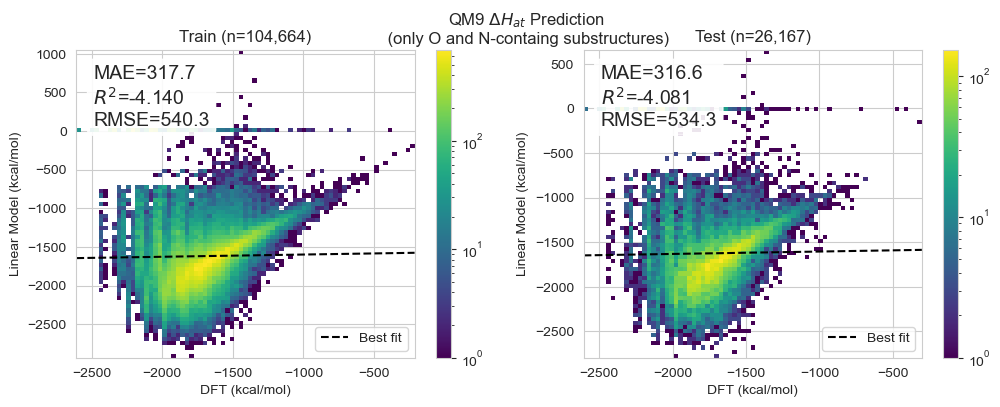

In [17]:
y_train, y_test = [sub_df['E_at'] for sub_df in [train, test]]

from sklearn.linear_model import Ridge
model = Ridge(fit_intercept=False, 
              alpha=1e-5, 
              solver='sparse_cg', 
              tol=1e-5)
model.fit(X_train, y_train)

from minervachem.plotting import parity_plot_train_test
parity_plot_train_test([X_train, X_test], 
                       [y_train, y_test],
                       model, 
                       figsize=(12, 4),
                       xlab='DFT (kcal/mol)', 
                       ylab='Linear Model (kcal/mol)', 
                       title='QM9 $\Delta H_{at}$ Prediction \n (only O and N-containg substructures)', 
                       bins=75
                      );

All organic molecules have a carbom backbone, let's see how the quality of the regression changes when we filter for carbon atoms instead of oxygen and nitrogen.

In [18]:
featurizer_c = FingerprintFeaturizer(
    fingerprinter=GraphletFingerprinter(max_len=5, elements=('C', ), filter_in=True),
    verbose=0,         # Optional verbosity parameter
    # Parallel Arguments
    n_jobs=-3,         # For joblib, this means all n_cores-2. 
    chunk_size='auto', # Optional, how many molecules each core should do in a batch.
)

X_train_c = featurizer_c.fit_transform(train['mol'])
X_test_c = featurizer_c.transform(test['mol'])

Number of cores used: -3


Constructing Fingerprints:   0%|          | 0/104664 [00:00<?, ?it/s]

/Users/ypimonova/anaconda3/envs/architector_s/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Converting FPs to sparse:   0%|          | 0/104664 [00:00<?, ?it/s]

Number of cores used: -3


Constructing Fingerprints:   0%|          | 0/26167 [00:00<?, ?it/s]

Converting FPs to sparse:   0%|          | 0/26167 [00:00<?, ?it/s]

Converting FPs to sparse:   0%|          | 0/26167 [00:00<?, ?it/s]

/Users/ypimonova/anaconda3/envs/architector_s/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/ypimonova/anaconda3/envs/architector_s/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


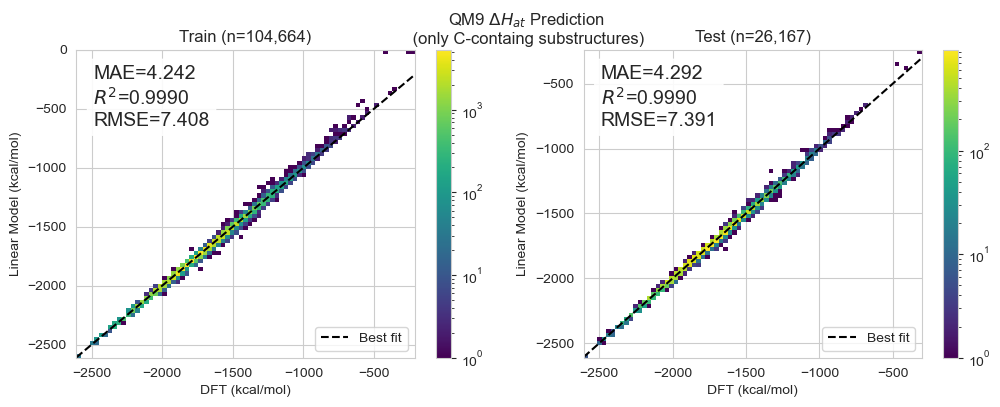

In [19]:
model_c = Ridge(fit_intercept=False, 
              alpha=1e-5, 
              solver='sparse_cg', 
              tol=1e-5)
model_c.fit(X_train_c, y_train)

parity_plot_train_test([X_train_c, X_test_c], 
                       [y_train, y_test],
                       model_c, 
                       figsize=(12, 4),
                       xlab='DFT (kcal/mol)', 
                       ylab='Linear Model (kcal/mol)', 
                       title='QM9 $\Delta H_{at}$ Prediction \n (only C-containg substructures)', 
                       bins=75
                      );